In [1]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [4]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [5]:
df = pd.read_excel('Platinum_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

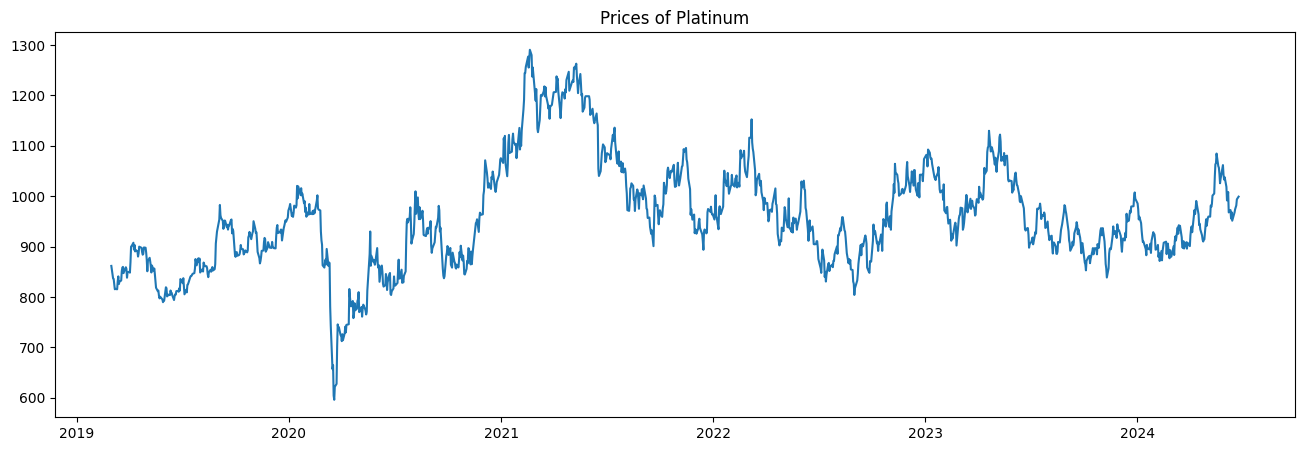

In [6]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of Platinum')
    plt.show()

In [7]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,861.599976,861.599976,861.599976,861.599976,0
2019-03-04,2019-03-04,836.799988,836.799988,836.799988,836.799988,0
2019-03-05,2019-03-05,840.200012,840.200012,835.900024,835.900024,2
2019-03-06,2019-03-06,828.299988,828.400024,826.200012,826.200012,2
2019-03-07,2019-03-07,825.000000,825.000000,815.299988,815.299988,4
...,...,...,...,...,...,...
2024-06-17,2024-06-17,963.200012,967.799988,961.200012,967.799988,8
2024-06-18,2024-06-18,974.099976,974.099976,974.099976,974.099976,8
2024-06-20,2024-06-20,981.599976,981.599976,981.599976,981.599976,8
2024-06-21,2024-06-21,993.700012,993.700012,993.700012,993.700012,8


In [8]:
# Split dataset 

In [9]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [10]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [11]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [12]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.20703, saving model to save_model_7_2_1.keras
17/17 - 3s - 189ms/step - loss: 0.2070
Epoch 2/80

Epoch 2: loss improved from 0.20703 to 0.07380, saving model to save_model_7_2_1.keras
17/17 - 1s - 49ms/step - loss: 0.0738
Epoch 3/80

Epoch 3: loss improved from 0.07380 to 0.06407, saving model to save_model_7_2_1.keras
17/17 - 1s - 47ms/step - loss: 0.0641
Epoch 4/80

Epoch 4: loss improved from 0.06407 to 0.05850, saving model to save_model_7_2_1.keras
17/17 - 1s - 48ms/step - loss: 0.0585
Epoch 5/80

Epoch 5: loss improved from 0.05850 to 0.05516, saving model to save_model_7_2_1.keras
17/17 - 1s - 48ms/step - loss: 0.0552
Epoch 6/80

Epoch 6: loss improved from 0.05516 to 0.05283, saving model to save_model_7_2_1.keras
17/17 - 1s - 49ms/step - loss: 0.0528
Epoch 7/80

Epoch 7: loss did not improve from 0.05283
17/17 - 1s - 47ms/step - loss: 0.0546
Epoch 8/80

Epoch 8: loss did not improve from 0.05283
17/17 - 1s - 47ms/step - loss: 0.0605
Epoch 

In [13]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Original y_train shape: (828, 1)
Predicted y_train shape: (828, 1)


In [14]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [15]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [17]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5759782791137695], [0.5706227421760559], [0.5647676587104797], [0.5601499080657959], [0.5573710203170776], [0.5563202500343323], [0.5564698576927185], [0.5571749806404114], [0.5578771829605103], [0.5582048892974854], [0.5579913258552551], [0.5572380423545837], [0.556053102016449], [0.5545879006385803], [0.5529880523681641], [0.5513643622398376], [0.5497837066650391], [0.5482717752456665], [0.5468257069587708], [0.545427143573761], [0.5440536737442017], [0.5426863431930542], [0.5413134694099426], [0.5399305820465088], [0.5385391712188721], [0.5371439456939697], [0.5357505679130554], [0.5343640446662903], [0.5329877734184265], [0.5316231846809387]]


In [18]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [19]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[996.03210679]
 [992.31161554]
 [988.24408934]
 [985.0361382 ]
 [983.10564501]
 [982.37567495]
 [982.47960738]
 [982.96945626]
 [983.45727618]
 [983.68493375]
 [983.53657124]
 [983.01326523]
 [982.19008723]
 [981.17221191]
 [980.06079739]
 [978.93281994]
 [977.83473859]
 [976.78439991]
 [975.77981634]
 [974.80823442]
 [973.854085  ]
 [972.90420053]
 [971.95046518]
 [970.9897734 ]
 [970.02316036]
 [969.05389726]
 [968.08591778]
 [967.12270015]
 [966.16660458]
 [965.21862485]]


In [20]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

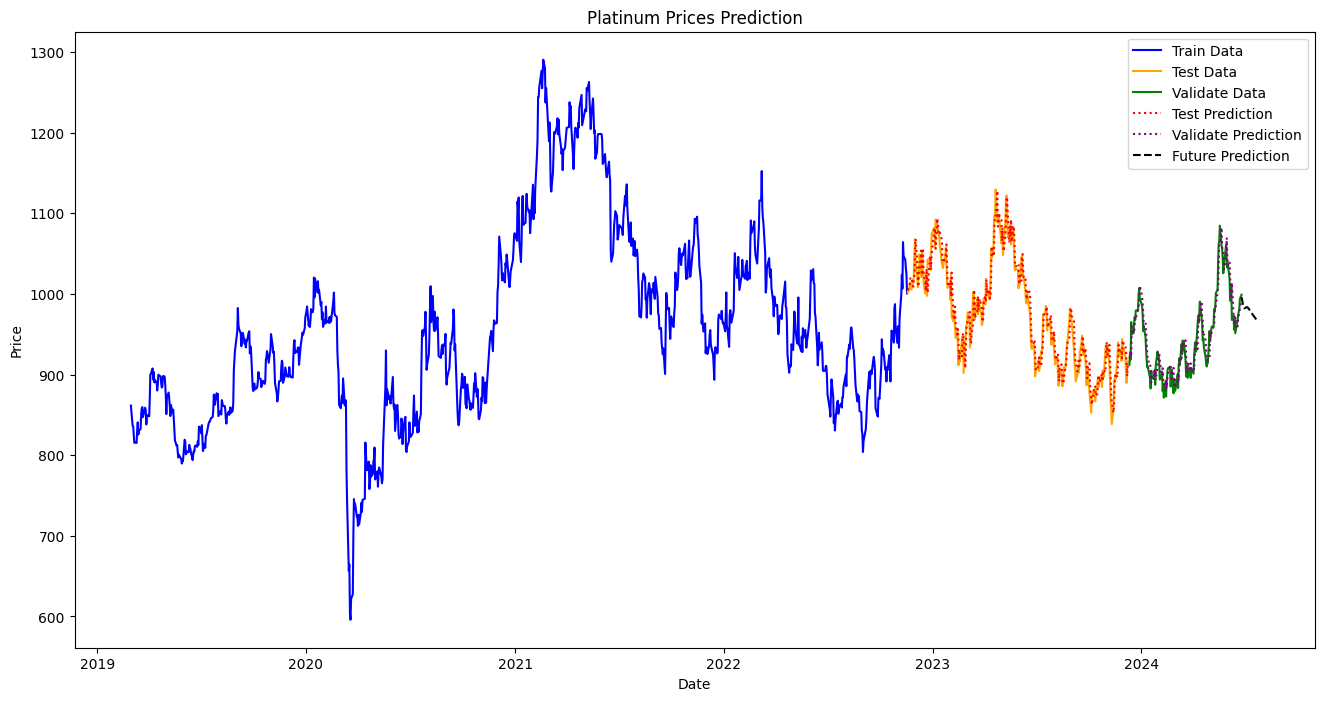

In [21]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 14.889695677203616
Lower Bound of Future Prediction: [[981.14241111]
 [977.42191986]
 [973.35439367]
 [970.14644252]
 [968.21594934]
 [967.48597927]
 [967.5899117 ]
 [968.07976058]
 [968.5675805 ]
 [968.79523808]
 [968.64687556]
 [968.12356955]
 [967.30039156]
 [966.28251623]
 [965.17110172]
 [964.04312426]
 [962.94504291]
 [961.89470423]
 [960.89012066]
 [959.91853875]
 [958.96438932]
 [958.01450485]
 [957.0607695 ]
 [956.10007772]
 [955.13346469]
 [954.16420158]
 [953.19622211]
 [952.23300447]
 [951.27690891]
 [950.32892918]]
Upper Bound of Future Prediction: [[1010.92180247]
 [1007.20131122]
 [1003.13378502]
 [ 999.92583387]
 [ 997.99534069]
 [ 997.26537063]
 [ 997.36930306]
 [ 997.85915194]
 [ 998.34697185]
 [ 998.57462943]
 [ 998.42626692]
 [ 997.90296091]
 [ 997.07978291]
 [ 996.06190759]
 [ 994.95049307]
 [ 993.82251562]
 [ 992.72443427]
 [ 991.67409558]
 [ 990.66951202]
 [ 989.6979301 ]
 [ 988.74378068]
 [ 987.79389621]
 [ 986.84016086]
 [ 985.87946908]
 [ 984.

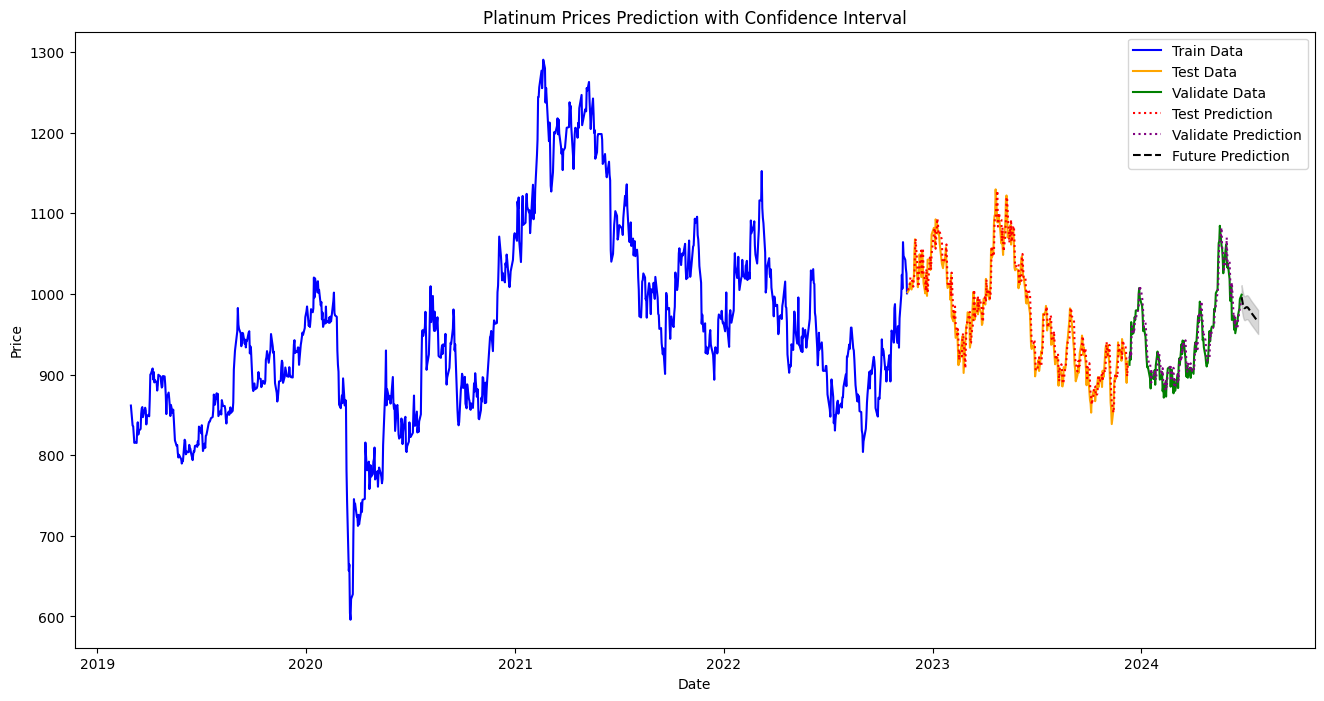

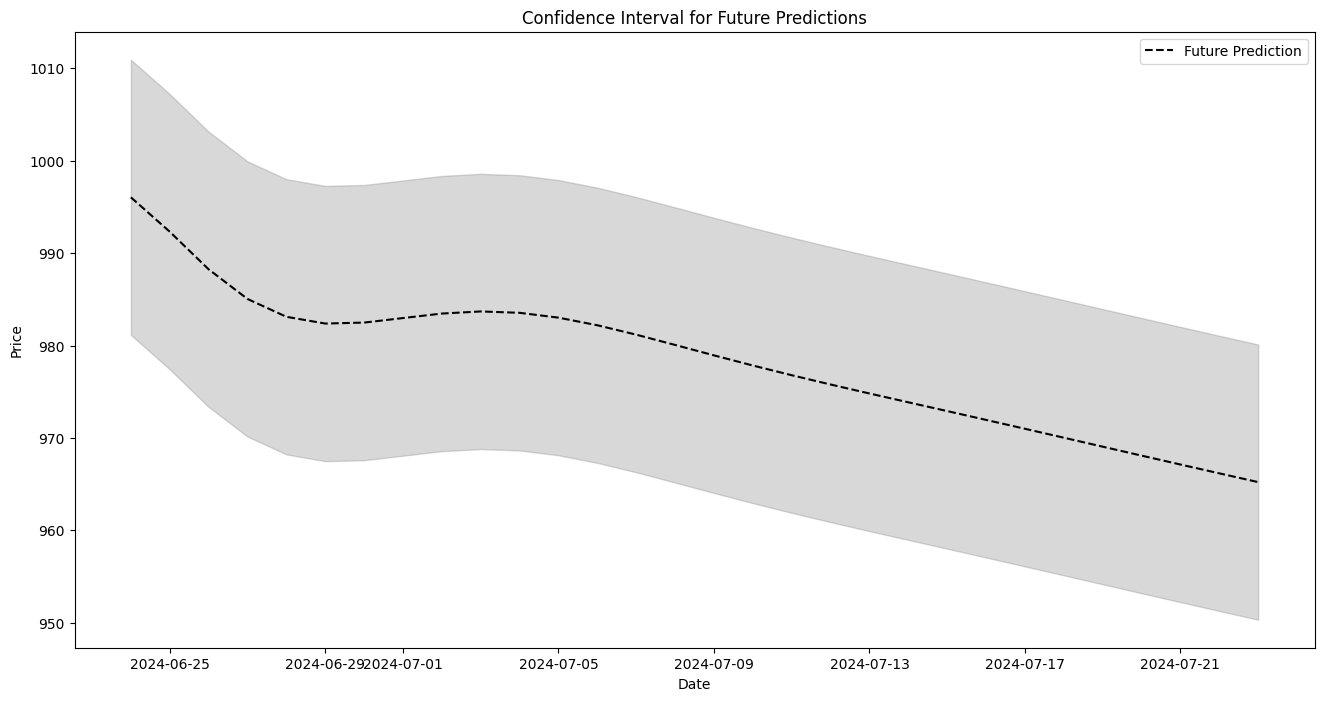

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [23]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.805363032502926
MAPE:  1.4216627707814475
RMSE:  17.397939990493516

** Validate **
MAE:  12.609941169397166
MAPE:  1.3354869662360023
RMSE:  15.556853877102236


In [24]:
# Split dataset 6-3-1

In [25]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [26]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [27]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.21443, saving model to save_model_6_3_1.keras
14/14 - 3s - 207ms/step - loss: 0.2144
Epoch 2/80

Epoch 2: loss improved from 0.21443 to 0.08072, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0807
Epoch 3/80

Epoch 3: loss improved from 0.08072 to 0.06810, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0681
Epoch 4/80

Epoch 4: loss improved from 0.06810 to 0.06442, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0644
Epoch 5/80

Epoch 5: loss improved from 0.06442 to 0.05904, saving model to save_model_6_3_1.keras
14/14 - 1s - 48ms/step - loss: 0.0590
Epoch 6/80

Epoch 6: loss improved from 0.05904 to 0.05466, saving model to save_model_6_3_1.keras
14/14 - 1s - 46ms/step - loss: 0.0547
Epoch 7/80

Epoch 7: loss improved from 0.05466 to 0.05427, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0543
Epoch 8/80

Epoch 8: loss improved from 0.05427 to 0.05

In [29]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [30]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

 9/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [31]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [33]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5624774694442749], [0.5463433861732483], [0.5299489498138428], [0.516109049320221], [0.5050225257873535], [0.49606335163116455], [0.4882519841194153], [0.4806508421897888], [0.4725878834724426], [0.4637297987937927], [0.4540533423423767], [0.4437563121318817], [0.43315213918685913], [0.42257511615753174], [0.4123143255710602], [0.4025784134864807], [0.3934887945652008], [0.385090172290802], [0.3773713707923889], [0.37028712034225464], [0.3637773394584656], [0.3577803075313568], [0.3522407114505768], [0.3471119701862335], [0.34235647320747375], [0.3379427492618561], [0.33384302258491516], [0.3300310969352722], [0.3264804780483246], [0.32316407561302185]]


In [34]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [35]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[986.65309497]
 [975.44474811]
 [964.05553397]
 [954.44095578]
 [946.73914842]
 [940.51521057]
 [935.08865394]
 [929.80814101]
 [924.20680399]
 [918.05309299]
 [911.33085917]
 [904.17751278]
 [896.81079436]
 [889.46293698]
 [882.33476626]
 [875.57122861]
 [869.25667079]
 [863.4221483 ]
 [858.05989728]
 [853.13846884]
 [848.61612437]
 [844.44998659]
 [840.60162946]
 [837.03869315]
 [833.73504963]
 [830.66883583]
 [827.8207559 ]
 [825.17261134]
 [822.70599657]
 [820.40209196]]


In [36]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

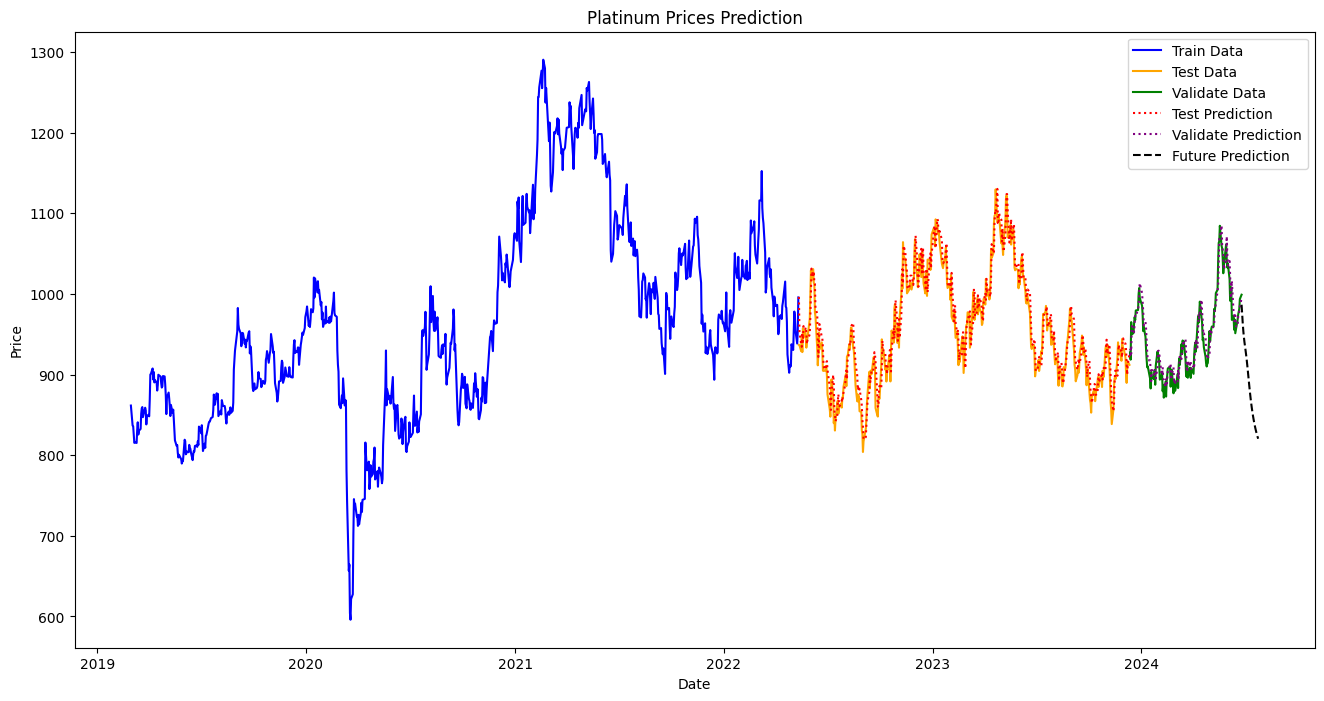

In [37]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 97.99751326717224
Lower Bound of Future Prediction: [[888.65558171]
 [877.44723484]
 [866.05802071]
 [856.44344251]
 [848.74163515]
 [842.5176973 ]
 [837.09114067]
 [831.81062775]
 [826.20929072]
 [820.05557973]
 [813.3333459 ]
 [806.17999952]
 [798.81328109]
 [791.46542371]
 [784.33725299]
 [777.57371534]
 [771.25915752]
 [765.42463503]
 [760.06238401]
 [755.14095557]
 [750.61861111]
 [746.45247332]
 [742.60411619]
 [739.04117989]
 [735.73753637]
 [732.67132256]
 [729.82324264]
 [727.17509807]
 [724.70848331]
 [722.4045787 ]]
Upper Bound of Future Prediction: [[1084.65060824]
 [1073.44226138]
 [1062.05304724]
 [1052.43846904]
 [1044.73666169]
 [1038.51272384]
 [1033.08616721]
 [1027.80565428]
 [1022.20431725]
 [1016.05060626]
 [1009.32837244]
 [1002.17502605]
 [ 994.80830762]
 [ 987.46045024]
 [ 980.33227952]
 [ 973.56874187]
 [ 967.25418405]
 [ 961.41966157]
 [ 956.05741054]
 [ 951.1359821 ]
 [ 946.61363764]
 [ 942.44749985]
 [ 938.59914273]
 [ 935.03620642]
 [ 931.7

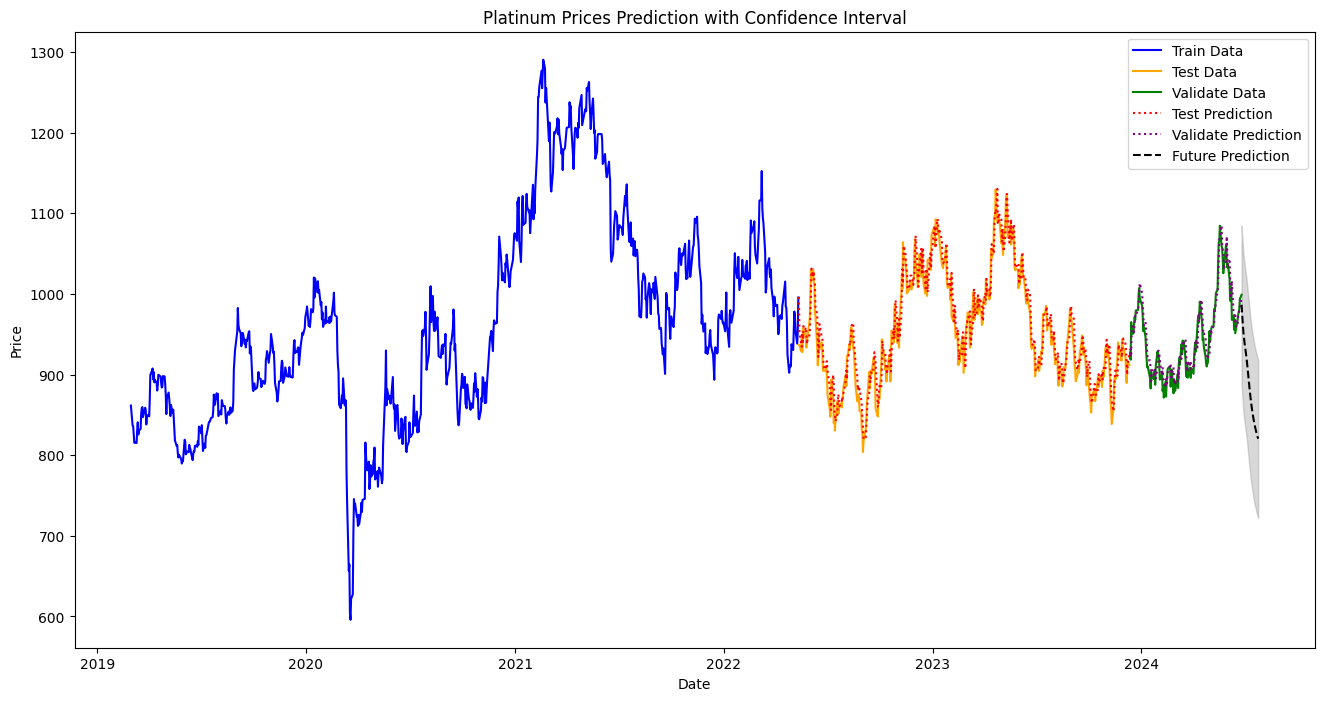

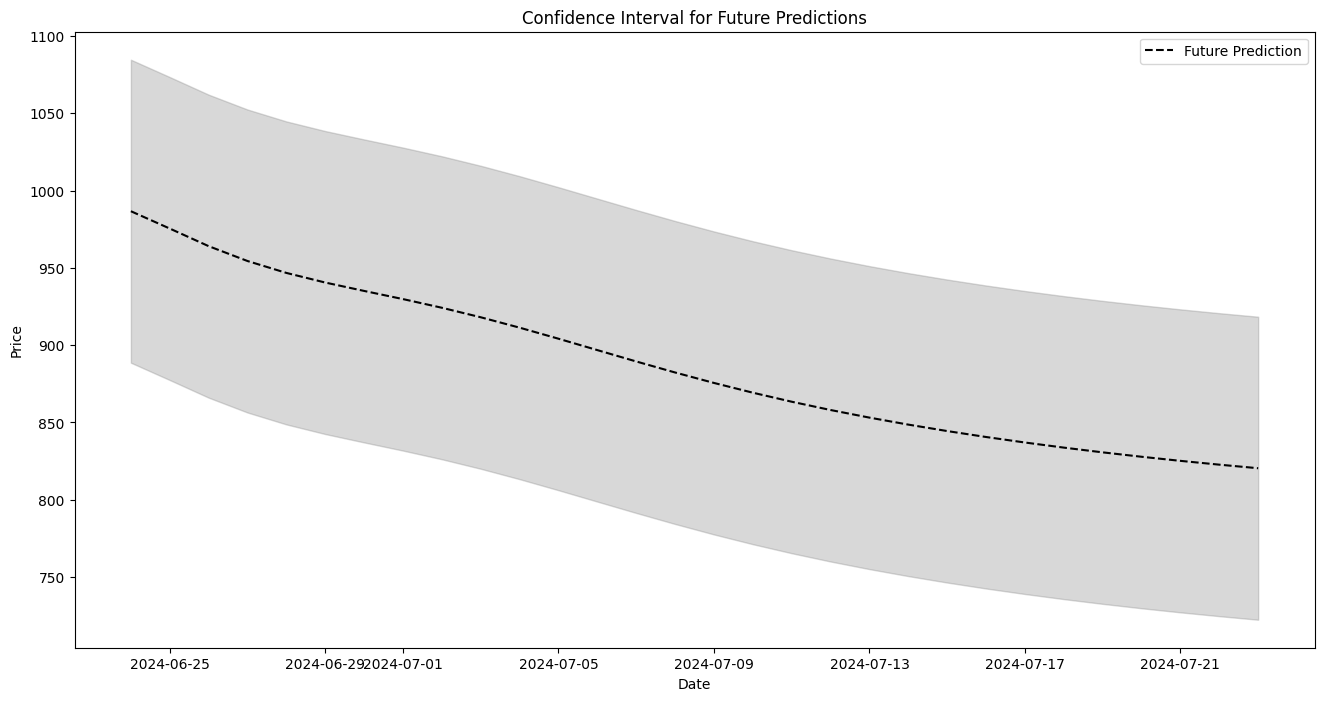

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [39]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.910865515320738
MAPE:  1.5707972458620378
RMSE:  18.752428769064984

** Validate **
MAE:  12.955354848302413
MAPE:  1.3735417468768072
RMSE:  15.925615772354691


In [40]:
# Split dataset 5-3-2 

In [41]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [42]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [43]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [44]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.21726, saving model to save_model_5_3_2.keras
12/12 - 3s - 280ms/step - loss: 0.2173
Epoch 2/80

Epoch 2: loss improved from 0.21726 to 0.09045, saving model to save_model_5_3_2.keras
12/12 - 1s - 62ms/step - loss: 0.0904
Epoch 3/80

Epoch 3: loss improved from 0.09045 to 0.08116, saving model to save_model_5_3_2.keras
12/12 - 1s - 60ms/step - loss: 0.0812
Epoch 4/80

Epoch 4: loss improved from 0.08116 to 0.06592, saving model to save_model_5_3_2.keras
12/12 - 1s - 69ms/step - loss: 0.0659
Epoch 5/80

Epoch 5: loss improved from 0.06592 to 0.05796, saving model to save_model_5_3_2.keras
12/12 - 1s - 56ms/step - loss: 0.0580
Epoch 6/80

Epoch 6: loss improved from 0.05796 to 0.05456, saving model to save_model_5_3_2.keras
12/12 - 1s - 54ms/step - loss: 0.0546
Epoch 7/80

Epoch 7: loss improved from 0.05456 to 0.05252, saving model to save_model_5_3_2.keras
12/12 - 1s - 55ms/step - loss: 0.0525
Epoch 8/80

Epoch 8: loss did not improve from 0.05252


In [45]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [46]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [47]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [48]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [49]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5788196921348572], [0.5783640742301941], [0.5763964056968689], [0.5757617950439453], [0.5772321820259094], [0.5807271599769592], [0.5856857299804688], [0.5913756489753723], [0.5971440076828003], [0.602562427520752], [0.6074625849723816], [0.6118919253349304], [0.6160280704498291], [0.6200862526893616], [0.6242462992668152], [0.6286149621009827], [0.6332202553749084], [0.6380290389060974], [0.6429767608642578], [0.647995114326477], [0.6530320644378662], [0.6580604314804077], [0.663076639175415], [0.6680929660797119], [0.6731281280517578], [0.6781988143920898], [0.6833146214485168], [0.6884768605232239], [0.6936799883842468], [0.6989136934280396]]


In [50]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [51]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[ 998.00603628]
 [ 997.68951854]
 [ 996.32257931]
 [ 995.88171532]
 [ 996.90319308]
 [ 999.33115409]
 [1002.77587243]
 [1006.72865888]
 [1010.73593739]
 [1014.50011339]
 [1017.90425253]
 [1020.98131507]
 [1023.85469488]
 [1026.67391388]
 [1029.56389803]
 [1032.59880789]
 [1035.7981049 ]
 [1039.13876659]
 [1042.57594879]
 [1046.0621987 ]
 [1049.56136769]
 [1053.05457403]
 [1056.53933327]
 [1060.02417533]
 [1063.5221021 ]
 [1067.04470766]
 [1070.59865857]
 [1074.1848658 ]
 [1077.79947847]
 [1081.43533311]]


In [52]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

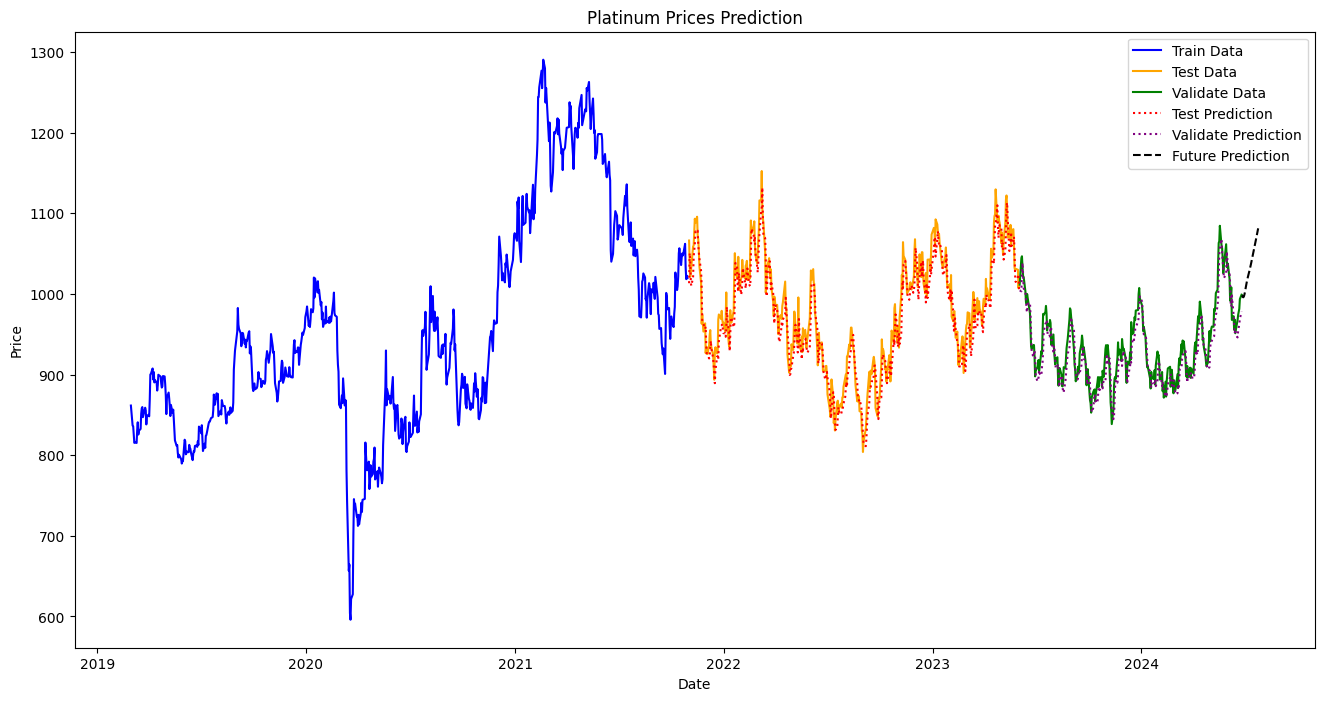

In [53]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

Margin of Error: 53.55947000429558
Lower Bound of Future Prediction: [[ 944.44656627]
 [ 944.13004854]
 [ 942.7631093 ]
 [ 942.32224531]
 [ 943.34372308]
 [ 945.77168409]
 [ 949.21640243]
 [ 953.16918888]
 [ 957.17646739]
 [ 960.94064339]
 [ 964.34478253]
 [ 967.42184506]
 [ 970.29522487]
 [ 973.11444388]
 [ 976.00442803]
 [ 979.03933789]
 [ 982.2386349 ]
 [ 985.57929658]
 [ 989.01647879]
 [ 992.50272869]
 [ 996.00189769]
 [ 999.49510403]
 [1002.97986327]
 [1006.46470532]
 [1009.9626321 ]
 [1013.48523765]
 [1017.03918857]
 [1020.6253958 ]
 [1024.24000847]
 [1027.87586311]]
Upper Bound of Future Prediction: [[1051.56550628]
 [1051.24898855]
 [1049.88204931]
 [1049.44118532]
 [1050.46266309]
 [1052.8906241 ]
 [1056.33534244]
 [1060.28812889]
 [1064.2954074 ]
 [1068.0595834 ]
 [1071.46372254]
 [1074.54078507]
 [1077.41416488]
 [1080.23338388]
 [1083.12336804]
 [1086.1582779 ]
 [1089.35757491]
 [1092.69823659]
 [1096.1354188 ]
 [1099.6216687 ]
 [1103.1208377 ]
 [1106.61404404]
 [1110.09880

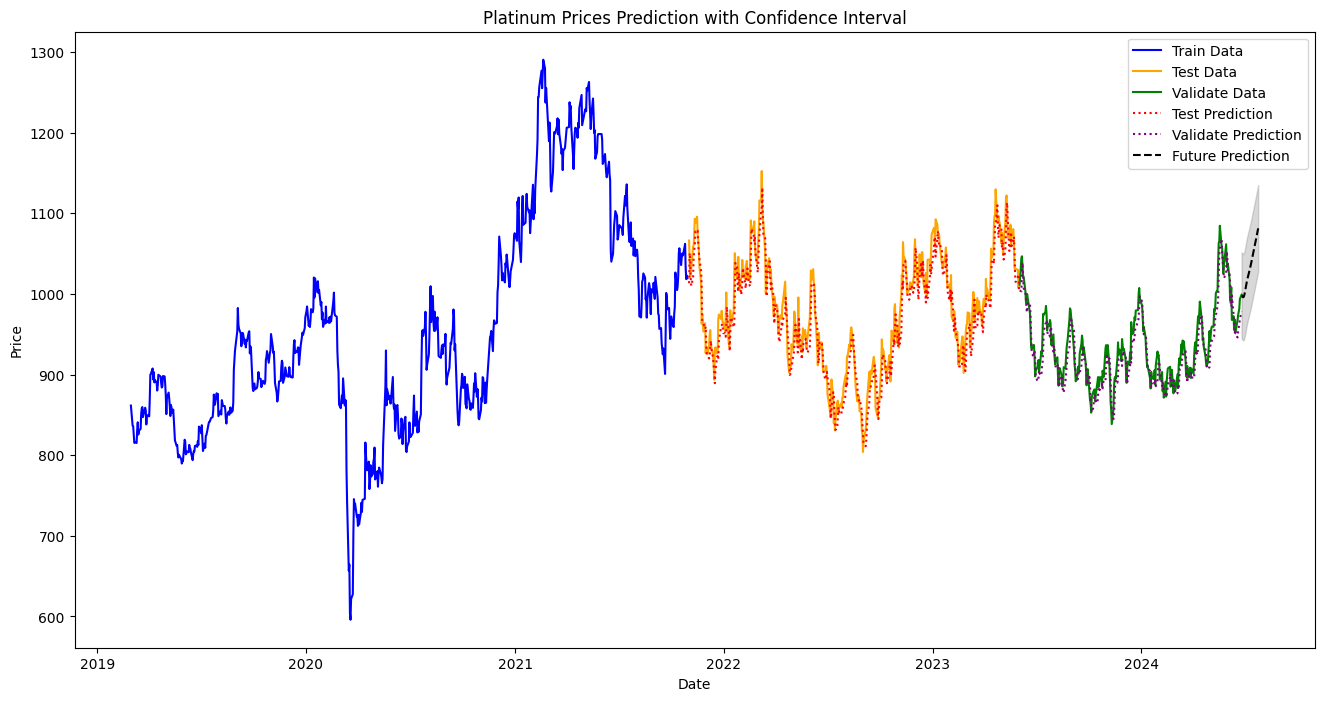

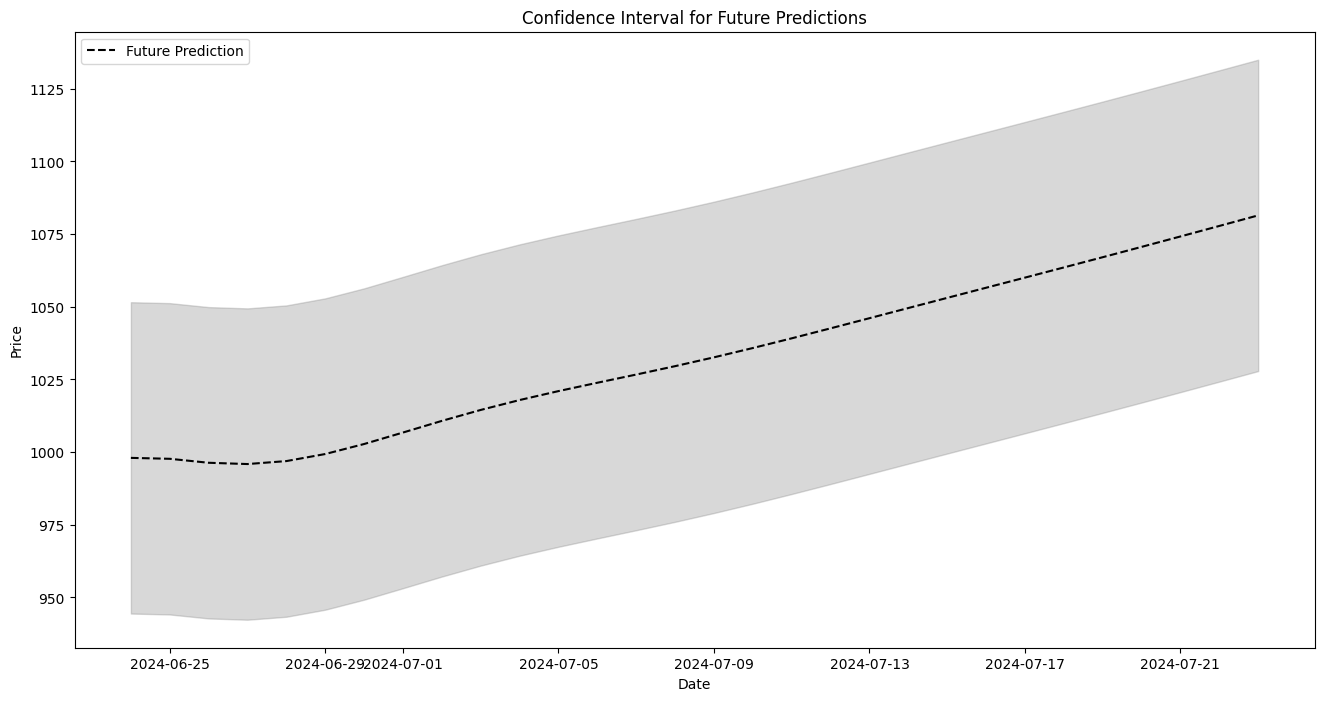

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [55]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  17.919659945233978
MAPE:  1.8228679249684254
RMSE:  22.389329229312985

** Validate **
MAE:  14.469963131094346
MAPE:  1.5388174486546988
RMSE:  17.72771134608661


In [57]:
import pandas as pd

# Original data with percentage for MAPE
data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [14.4476, 17.6834, 20.2988],
    "Testing MAPE": ["1.4876%", "1.8642%", "2.0794%"],  # Add percentage signs
    "Testing RMSE": [18.1176, 21.7575, 24.8895],
    "Validation MAE": [12.9100, 15.2484, 16.3783],
    "Validation MAPE": ["1.3688%", "1.6192%", "1.7569%"],  # Add percentage signs
    "Validation RMSE": [16.0406, 19.1244, 20.2222],
    "Margin Of Error": [14.889695677203616, 97.99751326717224, 53.55947000429558],
    "Confidence Score": [0.9695602475548497, 0.7790342401759602, 0.8962956678121119],
}

# Create DataFrame
df = pd.DataFrame(data)

# Print the updated DataFrame
print(df.to_string(index=False))


Model Ratio  Testing MAE Testing MAPE  Testing RMSE  Validation MAE Validation MAPE  Validation RMSE  Margin Of Error  Confidence Score
 LSTM 7-2-1      14.4476      1.4876%       18.1176         12.9100         1.3688%          16.0406        14.889696          0.969560
 LSTM 6-3-1      17.6834      1.8642%       21.7575         15.2484         1.6192%          19.1244        97.997513          0.779034
 LSTM 5-3-2      20.2988      2.0794%       24.8895         16.3783         1.7569%          20.2222        53.559470          0.896296
